# Import Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Load The Dataset

In [83]:
# Load dataset
data = pd.read_csv('vehicle_data.csv')

# Display first few rows
print(data.head())



                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

# Data Exploration and Cleaning

In [84]:
# Check for null values
print(data.isnull().sum())

# Drop rows with missing price
data.dropna(subset=['price'], inplace=True)

# Fill or drop other missing values
data.fillna({'mileage': data['mileage'].median()}, inplace=True)

# Display basic info about the dataset
print(data.info())


name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            979 non-null    object 
 1   description     923 non-null    object 
 2   make            979 non-null    object 
 3   model           979 non-null    object 
 4   year            979 non-null    int64  
 5   price           979 non-null    float64
 6   engine          977 non-null    object 
 7   cylinders       877 non-null    float64
 8   fuel            972 non-null    object 
 9   mileage     

# Feature Selection

In [85]:
selected_features = ['make', 'model', 'year', 'mileage', 'fuel', 'body', 'transmission', 'engine', 'price']
data = data[selected_features]

# Encode target variable
X = data.drop(columns=['price'])
y = data['price']


# Train Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (783, 8)
Testing size: (196, 8)


# Data Preprocessing

In [87]:
# Identify categorical and numerical columns
categorical_columns = ['make', 'model', 'fuel', 'body', 'transmission', 'engine']
numerical_columns = ['year', 'mileage']

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])


# Build the Model Pipeline

In [88]:
# Define the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'mileage']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'fuel',
                                                   'body', 'transmission',
                                                   'engine'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Evaluate the Model

In [89]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Squared Error: 75162010.37893076
R2 Score: 0.7538821907969812


# Visualize Results

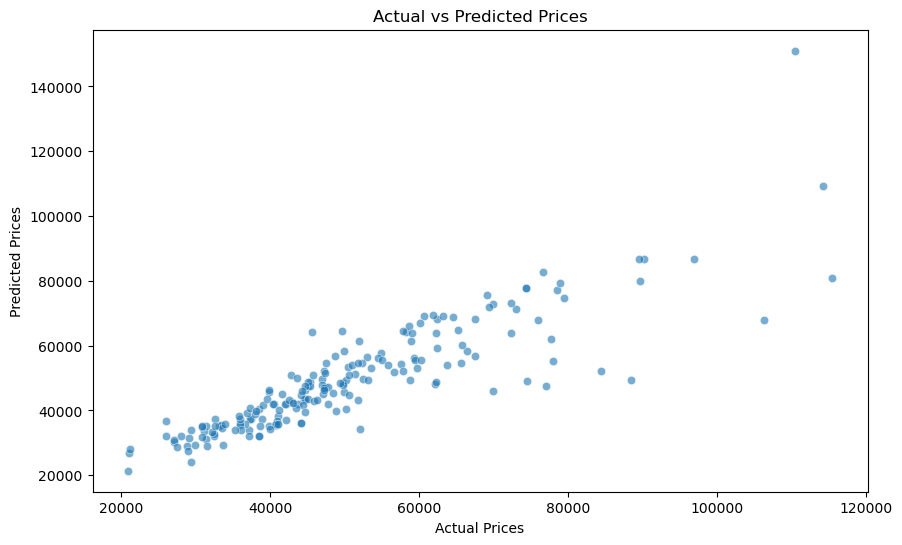

In [90]:
# Compare actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


# Save the Model

In [91]:
import joblib

# Save the trained model
joblib.dump(model, 'vehicle_price_prediction_model.pkl')


['vehicle_price_prediction_model.pkl']